# Importing dataset

In [2]:
import pandas as pd

housing_df = pd.read_csv("housing_coursework_entire_dataset_23-24.csv")
housing_df.head()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY


# Data Preparation

In [6]:
housing_df['median_house_value'].describe()

count      1000.000000
mean     207767.443000
std      113675.832278
min       14999.000000
25%      119900.000000
50%      184350.000000
75%      261950.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [3]:
housing_df.isna().sum()

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        9
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       2
dtype: int64

In [4]:
# encoding categorical data, 'ocean_proximity'
from sklearn.preprocessing import LabelEncoder

column_name = 'ocean_proximity'
label_encoder = LabelEncoder()

# Fit and transform the categorical column
housing_df[column_name + '_encoded'] = label_encoder.fit_transform(housing_df[column_name])

housing_df

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY,2
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY,2
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY,2
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY,2
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,-119.30,36.30,14,3023,469.0,1523,492,5.3602,118600,INLAND,1
996,997,-121.70,38.65,22,1360,282.0,808,229,2.4167,225000,INLAND,1
997,998,-121.92,38.57,10,1320,246.0,898,228,1.9327,193800,INLAND,1
998,999,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,INLAND,1


# Defining Input Features and Target Variable

In [4]:
x = housing_df.drop(columns = ['No.', 'median_house_value', 'ocean_proximity'])
y = housing_df['median_house_value']

x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,2
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,2
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,2
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,2
4,-122.19,37.79,50,954,217.0,546,201,2.6667,2
...,...,...,...,...,...,...,...,...,...
995,-119.30,36.30,14,3023,469.0,1523,492,5.3602,1
996,-121.70,38.65,22,1360,282.0,808,229,2.4167,1
997,-121.92,38.57,10,1320,246.0,898,228,1.9327,1
998,-122.00,38.83,26,272,49.0,194,52,3.4187,1


In [5]:
x.isna().sum()

longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
total_bedrooms             9
population                 0
households                 0
median_income              0
ocean_proximity_encoded    0
dtype: int64

# Splitting Traing and Test Data

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


#imputation method is used to replace the NaN values with median in this case
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Scaling Data

In [39]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Use StandardScaler to transform the combined arrays
x_train_scaler = scaler.fit_transform(x_train_imputed)
x_test_scaler = scaler.transform(x_test_imputed)

# Model Development

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [56]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree = 5)
x_polynomial_train = polynomial.fit_transform(x_train_scaler)
x_polynomial_test = polynomial.transform(x_test_scaler)
polynomial.fit(x_polynomial_train, y_train)
lr.fit(x_polynomial_train, y_train)

LinearRegression()

In [57]:
lr.coef_ 

array([-1.38432516e-03, -3.05365973e+05, -3.82477063e+05, ...,
        1.33578559e+05, -1.53330766e+05, -2.47582347e+05])

In [58]:
lr.intercept_

111818.86844388963

In [59]:
y_pred = lr.predict(x_polynomial_test)

# Evaluation

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
import math
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test, y_pred))

MSE:  531872898721535.4
MAE:  2733235.682651264
RMSE: 23062369.755112663
R2:  -46201.768107371216


In [61]:
y_pred_train = lr.predict(x_polynomial_train)

print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R2: ", r2_score(y_train, y_pred_train))

MSE:  1.0293580710364747e-11
MAE:  6.108313027652912e-07
RMSE: 3.208361062967313e-06
R2:  1.0


Overfitting occured in the model where the degree is 5 so there are significant differences between the test data and train data

# Hyperparameter Tuning 

In [62]:
# Another model creation with no degree value
polynomial = PolynomialFeatures(degree = 2)
x_polynomial_train = polynomial.fit_transform(x_train_scaler)
x_polynomial_test = polynomial.transform(x_test_scaler)
polynomial.fit(x_polynomial_train, y_train)
lr = LinearRegression()
lr.fit(x_polynomial_train, y_train)

LinearRegression()

In [63]:
lr.coef_ 

array([-1.33890200e-08, -1.03139725e+05, -1.11145887e+05,  1.38640952e+04,
       -3.21723493e+04,  8.02438426e+04, -1.11281479e+05,  5.98662054e+04,
        7.85032930e+04, -1.64490699e+04,  1.99130620e+04,  5.19543813e+04,
       -1.87645313e+04,  2.93503602e+04, -2.23558344e+04,  4.17785208e+04,
       -3.96060465e+04, -3.21462746e+04,  1.65736315e+03,  2.80629179e+04,
       -2.47175664e+04,  4.54364078e+04, -4.57701494e+04,  3.90852239e+04,
       -2.80212326e+04, -3.86327205e+04,  2.87841301e+03,  2.98980082e+03,
       -5.26205602e+02, -5.22589538e+03, -5.19627141e+04,  6.04429819e+04,
        3.18507778e+03,  3.10213911e+03, -5.63672582e+02,  9.70547465e+03,
       -2.84978049e+04,  3.10368171e+04,  5.01248834e+04, -2.20724162e+03,
       -2.68102592e+04, -8.54242237e+04,  1.11723403e+05,  1.65273950e+04,
        1.23840895e+04,  1.30697373e+04,  8.90867193e+04, -5.85774103e+04,
        1.10124946e+04, -1.12718404e+05, -8.15765221e+03, -1.76661210e+04,
       -8.30603881e+03, -

In [64]:
lr.intercept_

190211.65537697054

In [65]:
y_pred = lr.predict(x_polynomial_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test, y_pred))

MSE:  3915674532.211122
MAE:  45835.042853094084
RMSE: 62575.35083570145
R2:  0.6598529407485215


In [66]:
y_pred_train = lr.predict(x_polynomial_train)

print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R2: ", r2_score(y_train, y_pred_train))

MSE:  3552711857.8425145
MAE:  43371.325527227746
RMSE: 59604.62950008593
R2:  0.7319110059380254


When 2 is given as a degree , the model made a robust fit so no such difference between the train and test data

# Plotting the Result

Text(0.5, 1.0, 'Actual vs Predicted')

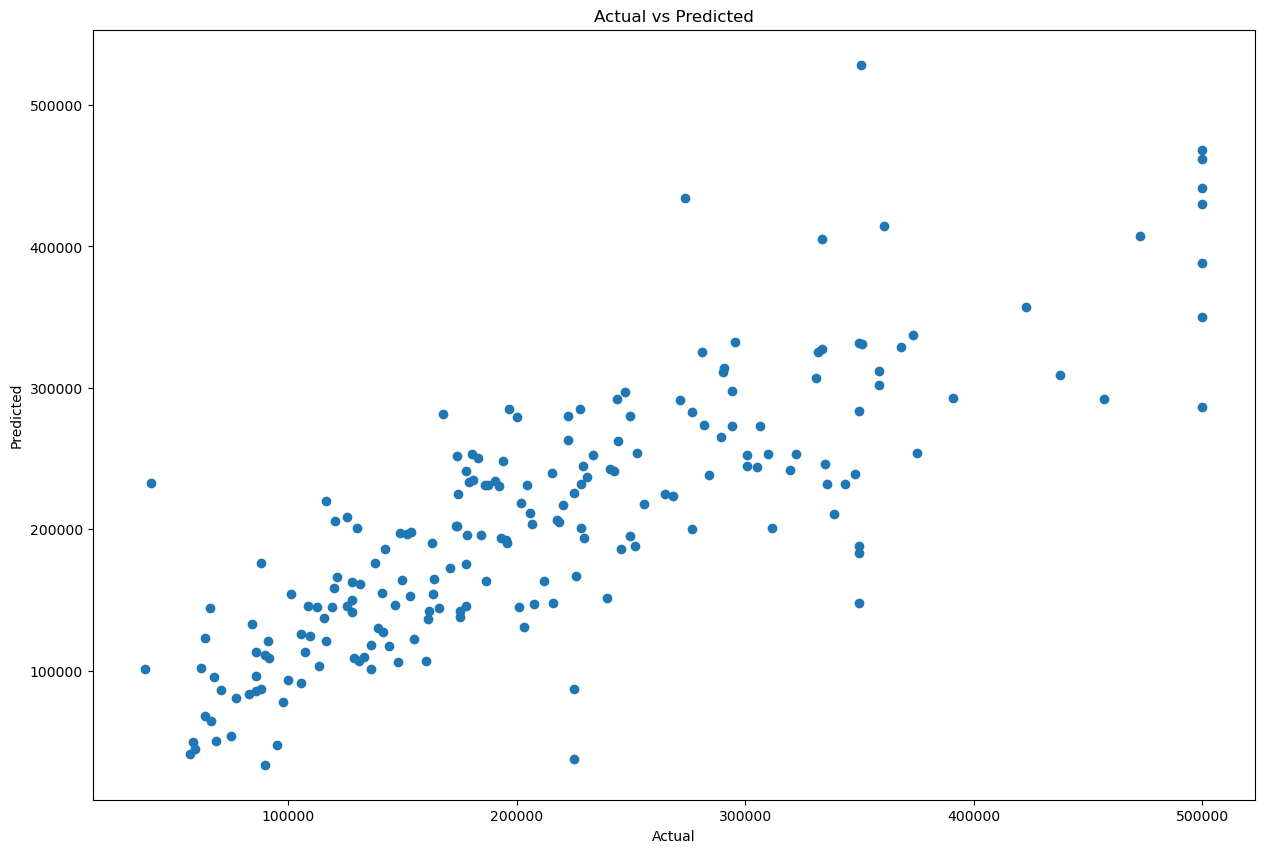

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Actual vs Predicted')